# ***Complete Guide to Generative AI for Data Analysis and Data Science***

---





### **Chapter 14:** *Building Machine Learning Models - Clustering*


a) Clustering with K-Means

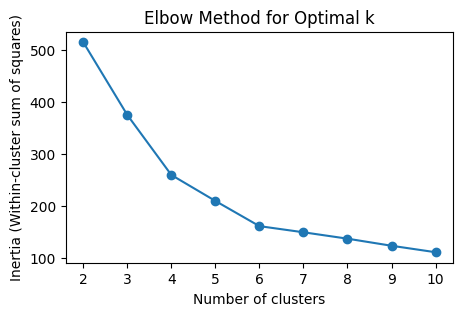

Silhouette Scores by Cluster Count:
k=2: 0.319
k=3: 0.337
k=4: 0.414
k=5: 0.427
k=6: 0.439
k=7: 0.428
k=8: 0.380
k=9: 0.360
k=10: 0.368

✅ Best number of clusters (by silhouette score): 6

Cluster counts:
Cluster
0    44
1    39
5    37
3    35
2    24
4    21
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Drop non-numeric columns (like IDs or Names) if present
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values by filling with column mean
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# --- Step 1: Elbow method to determine optimal clusters ---
inertia = []
K = range(2, 11)  # testing 2–10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.show()

# --- Step 2: Silhouette scores for evaluation ---
silhouette_scores = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

# Find best k by silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)

print("Silhouette Scores by Cluster Count:")
for k, score in silhouette_scores.items():
    print(f"k={k}: {score:.3f}")

print(f"\n✅ Best number of clusters (by silhouette score): {best_k}")

# --- Step 3: Final clustering with best k ---
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = final_kmeans.fit_predict(X_scaled)

print("\nCluster counts:")
print(df["Cluster"].value_counts())

b) Clustering with DBSCAN

✅ Number of clusters found: 6

Cluster counts:
Cluster
-1    78
 5    30
 1    28
 2    27
 0    17
 3    13
 4     7
Name: count, dtype: int64

Silhouette Score: 0.480


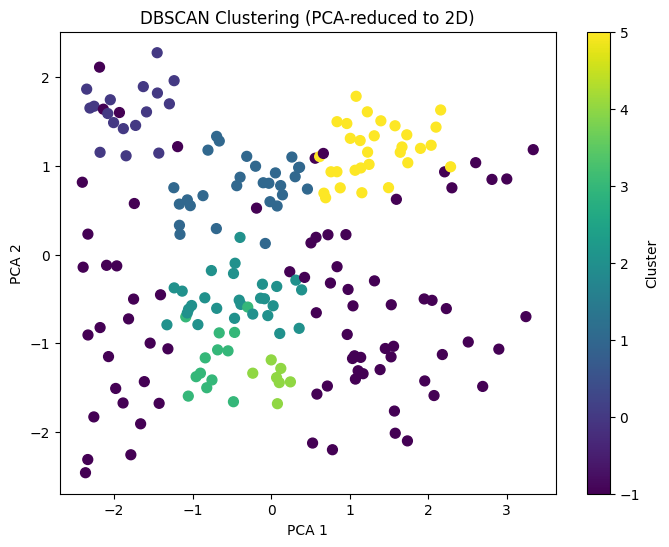

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Drop non-numeric columns like 'CustomerID', 'Gender'
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# --- Step 1: Run DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels back to dataframe
df["Cluster"] = labels

# --- Step 2: Evaluate ---
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"✅ Number of clusters found: {n_clusters}")
print("\nCluster counts:")
print(df["Cluster"].value_counts())

# Silhouette score (only if more than 1 cluster and not all noise)
if n_clusters > 1:
    mask = labels != -1  # remove noise
    sil_score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"\nSilhouette Score: {sil_score:.3f}")
else:
    print("\nSilhouette score not available (only 1 cluster or all noise).")

# --- Step 3: Visualize with PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

c) Clustering with Hierarchical Clustering

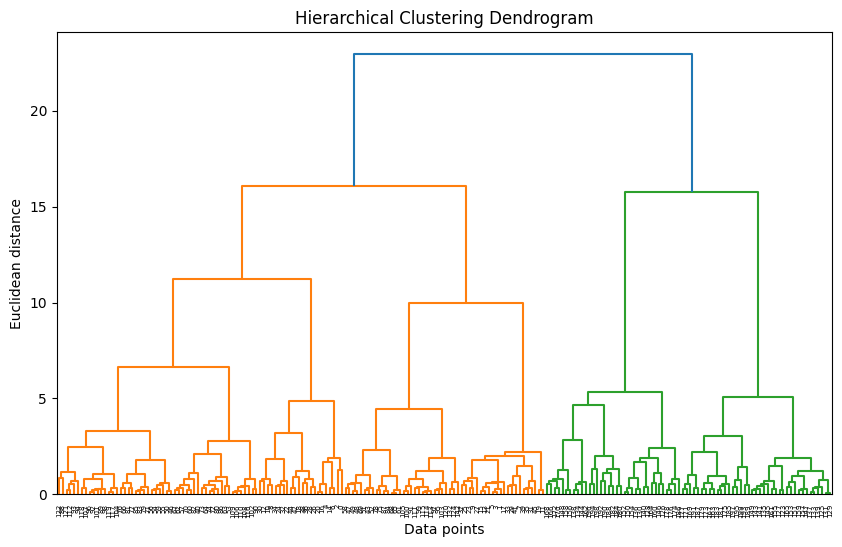

Number of clusters: 4

Cluster counts:
Cluster
0    74
2    52
3    39
1    35
Name: count, dtype: int64

Silhouette Score: 0.392


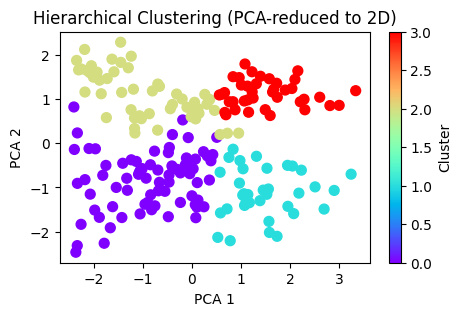

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Drop non-numeric columns like 'CustomerID', 'Gender'
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# --- Step 1: Create Dendrogram ---
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

# --- Step 2: Run Agglomerative Clustering ---
# Choose number of clusters (e.g., 4 based on dendrogram)
agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = agg.fit_predict(X_scaled)

df["Cluster"] = labels

# --- Step 3: Evaluate ---
n_clusters = len(set(labels))
print(f"Number of clusters: {n_clusters}")
print("\nCluster counts:")
print(df["Cluster"].value_counts())

if n_clusters > 1:
    sil_score = silhouette_score(X_scaled, labels)
    print(f"\nSilhouette Score: {sil_score:.3f}")

# --- Step 4: Visualize with PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(5,3))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="rainbow", s=50)
plt.title("Hierarchical Clustering (PCA-reduced to 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

**Challenge: Customer Segmentation**
*   Use a customer segmentation dataset
*   Use DBSCAN to generate a set of clusters
*   Modify the script to use k-means clustering with four clusters

Best eps: 2.8999999999999995, min_samples: 7
Number of clusters: 3
Noise points: 614
Best silhouette score: 0.115


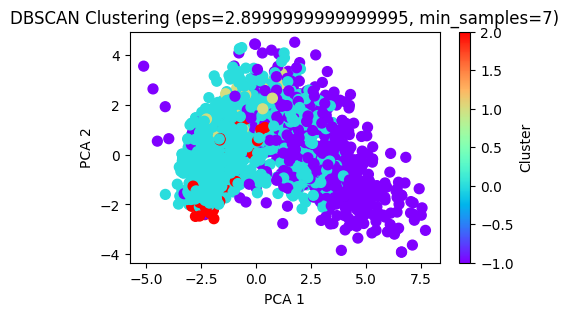

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/customer_segmentation.csv")

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Grid search for eps and min_samples
eps_values = np.arange(0.5, 3.1, 0.2)   # test eps from 0.5 to 3.0
min_samples_values = range(3, 11)       # test min_samples from 3 to 10

best_score = -1
best_params = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Skip if only noise or single cluster
        if len(set(labels)) <= 1 or len(set(labels)) == (1 if -1 in labels else 0):
            continue

        score = silhouette_score(X_scaled, labels)

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)
            best_labels = labels

# Report best result
if best_params:
    print(f"Best eps: {best_params[0]}, min_samples: {best_params[1]}")
    print(f"Number of clusters: {len(set(best_labels)) - (1 if -1 in best_labels else 0)}")
    print(f"Noise points: {list(best_labels).count(-1)}")
    print(f"Best silhouette score: {best_score:.3f}")
else:
    print("No valid clustering found.")

# --- Visualization with PCA ---
if best_labels is not None:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(5,3))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap="rainbow", s=50)
    plt.title(f"DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label="Cluster")
    plt.show()

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load CSV
file_path = '/content/customer_segmentation.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Fill NaN values with column mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Evaluate clustering
score = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for 4 clusters: {score:.4f}")

Silhouette Score for 4 clusters: 0.1799
